In [1]:
#import pandas, matplotlib, numpy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#create arrays of lats and longs, declare arrays as variables
lats = np.random.uniform(low = -90.000, high = 90.000, size = 1500)
lngs = np.random.uniform(low = -180.000, high = 180.000, size = 1500)
#use the zip function to create pairs from lats and lngs
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
#add the lat/lng pairs to a list
coordinates = list(lat_lngs)
coordinates

In [4]:
#import citipy module
from citipy import citipy

In [5]:
#Create a list to hold the cities
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #if the city is unique, add the city name to the city list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

610

In [6]:
#Import the requests library.
import requests

#imort the API key
from config import weather_api_key

#import the datetime module from the datetime library
from datetime import datetime

In [7]:
#build basic URL for the OWM with weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [8]:
#create an empty list to hold the weather data
city_data = []
#Print the beginning of the loggin
print('Beginning Data Retrieval   ')
print('---------------------------')

#create record count for cities 1-50
record_count = 1
#create set counter for sets of cities
set_count = 1

#loop through all the cities in the list
for i, city in enumerate(cities):
    
    #group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i>=50):
        set_count =+ 1
        record_count = 1
    #Create endpoint URL with each city
    city_url = url + '&q=' + city.replace(' ', '+')
    
    #log the URL, record, and set numbers and the city
    print(f'Processing Record {record_count} of Set {set_count} | {city}')
    #add 1 to the record count
    record_count +=1
    
#Run an API request for each of the cities.
    try:
        #Parse the JSON and retrieve data .
        city_weather = requests.get(city_url).json()
        #parse out the needed data
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        #Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d  %H:%M:%S')
        #append the city information into the city_data list.
        city_data.append({'City': city.title(),
                         'Lat': city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})
        
#if and error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
#indicate that Data Loading is complete.
print("-----------------------------")
print('Data Retrieval Complete      ')
print('-----------------------------')

Beginning Data Retrieval   
---------------------------
Processing Record 1 of Set 1 | williams lake
Processing Record 2 of Set 1 | puerto ayora
Processing Record 3 of Set 1 | haimen
Processing Record 4 of Set 1 | manadhoo
Processing Record 5 of Set 1 | ribeirao branco
Processing Record 6 of Set 1 | saint-pierre
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | bahir dar
Processing Record 9 of Set 1 | ponta do sol
Processing Record 10 of Set 1 | bandarbeyla
Processing Record 11 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 12 of Set 1 | nikolskoye
Processing Record 13 of Set 1 | dikson
Processing Record 14 of Set 1 | jamestown
Processing Record 15 of Set 1 | cayenne
Processing Record 16 of Set 1 | cabedelo
Processing Record 17 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 18 of Set 1 | pangnirtung
Processing Record 19 of Set 1 | zamora
Processing Record 20 of Set 1 | baturaja
Processing Record 21 of Set 1 | fostoria


Processing Record 38 of Set 1 | cody
Processing Record 39 of Set 1 | atuona
Processing Record 40 of Set 1 | krasnaya gora
Processing Record 41 of Set 1 | obera
Processing Record 42 of Set 1 | tamandare
Processing Record 43 of Set 1 | okhotsk
Processing Record 44 of Set 1 | vredendal
Processing Record 45 of Set 1 | tall kayf
Processing Record 46 of Set 1 | zalantun
Processing Record 47 of Set 1 | higuey
City not found. Skipping...
Processing Record 48 of Set 1 | vardo
Processing Record 49 of Set 1 | hualmay
Processing Record 50 of Set 1 | souillac
Processing Record 1 of Set 1 | bushehr
Processing Record 2 of Set 1 | marihatag
Processing Record 3 of Set 1 | bredasdorp
Processing Record 4 of Set 1 | rundu
Processing Record 5 of Set 1 | roald
Processing Record 6 of Set 1 | barkhan
Processing Record 7 of Set 1 | makakilo city
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | yulara
Processing Record 10 of Set 1 | atar
Processing Record 11 of Set 1 | hilo
Processing Record 1

Processing Record 31 of Set 1 | margate
Processing Record 32 of Set 1 | lakselv
Processing Record 33 of Set 1 | lagoa
Processing Record 34 of Set 1 | zhangjiakou
Processing Record 35 of Set 1 | montepuez
Processing Record 36 of Set 1 | monrovia
Processing Record 37 of Set 1 | wadi maliz
Processing Record 38 of Set 1 | lorengau
Processing Record 39 of Set 1 | kuche
City not found. Skipping...
Processing Record 40 of Set 1 | ayan
Processing Record 41 of Set 1 | gushikawa
Processing Record 42 of Set 1 | osmena
Processing Record 43 of Set 1 | sadovoye
Processing Record 44 of Set 1 | burewala
Processing Record 45 of Set 1 | campbell river
Processing Record 46 of Set 1 | vila velha
Processing Record 47 of Set 1 | kieta
Processing Record 48 of Set 1 | omsukchan
Processing Record 49 of Set 1 | maniitsoq
Processing Record 50 of Set 1 | anadyr
Processing Record 1 of Set 1 | blagoveshchensk
Processing Record 2 of Set 1 | harwich
Processing Record 3 of Set 1 | kantang
Processing Record 4 of Set 1 

Processing Record 24 of Set 1 | kawalu
Processing Record 25 of Set 1 | batabano
Processing Record 26 of Set 1 | kuryk
Processing Record 27 of Set 1 | weligama
Processing Record 28 of Set 1 | atikokan
Processing Record 29 of Set 1 | bukavu
Processing Record 30 of Set 1 | stoyba
City not found. Skipping...
Processing Record 31 of Set 1 | erenhot
Processing Record 32 of Set 1 | birin
Processing Record 33 of Set 1 | taoudenni
Processing Record 34 of Set 1 | san joaquin
Processing Record 35 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 36 of Set 1 | arcachon
Processing Record 37 of Set 1 | nagato
Processing Record 38 of Set 1 | belaya gora
Processing Record 39 of Set 1 | hobyo
Processing Record 40 of Set 1 | awbari
Processing Record 41 of Set 1 | alice springs
Processing Record 42 of Set 1 | zlitan
Processing Record 43 of Set 1 | caconda
Processing Record 44 of Set 1 | banfora
Processing Record 45 of Set 1 | emba
Processing Record 46 of Set 1 | honjo
Processing Record 47

In [9]:
#check the number of cities in the city_data array
len(city_data)

570

In [10]:
#convert the array of dictionaries to a DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Williams Lake,52.14,-122.14,46.40,93,40,0.74,CA,2020-08-27 13:58:29
1,Puerto Ayora,-0.74,-90.35,64.99,93,69,5.01,EC,2020-08-27 13:47:28
2,Haimen,23.19,116.61,77.00,100,40,4.12,CN,2020-08-27 13:58:30
3,Manadhoo,5.77,73.38,83.55,72,61,13.98,MV,2020-08-27 13:58:31
4,Ribeirao Branco,-24.22,-48.77,71.40,42,0,2.95,BR,2020-08-27 13:58:32
5,Saint-Pierre,-21.34,55.48,75.20,53,90,4.70,RE,2020-08-27 13:52:55
6,Busselton,-33.65,115.33,53.01,72,0,6.73,AU,2020-08-27 13:49:02
7,Bahir Dar,11.59,37.39,71.31,76,97,5.84,ET,2020-08-27 13:58:33
8,Ponta Do Sol,32.67,-17.10,87.01,51,20,18.34,PT,2020-08-27 13:51:10
9,Bandarbeyla,9.49,50.81,79.83,71,100,31.68,SO,2020-08-27 13:53:47


In [11]:
#reorder the columns
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Williams Lake,CA,2020-08-27 13:58:29,52.14,-122.14,46.40,93,40,0.74
1,Puerto Ayora,EC,2020-08-27 13:47:28,-0.74,-90.35,64.99,93,69,5.01
2,Haimen,CN,2020-08-27 13:58:30,23.19,116.61,77.00,100,40,4.12
3,Manadhoo,MV,2020-08-27 13:58:31,5.77,73.38,83.55,72,61,13.98
4,Ribeirao Branco,BR,2020-08-27 13:58:32,-24.22,-48.77,71.40,42,0,2.95
5,Saint-Pierre,RE,2020-08-27 13:52:55,-21.34,55.48,75.20,53,90,4.70
6,Busselton,AU,2020-08-27 13:49:02,-33.65,115.33,53.01,72,0,6.73
7,Bahir Dar,ET,2020-08-27 13:58:33,11.59,37.39,71.31,76,97,5.84
8,Ponta Do Sol,PT,2020-08-27 13:51:10,32.67,-17.10,87.01,51,20,18.34
9,Bandarbeyla,SO,2020-08-27 13:53:47,9.49,50.81,79.83,71,100,31.68


In [12]:
#create the output file (CSV)
output_data_file = 'weather_data/cities.csv'
#export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label = 'City_ID')

In [13]:
#extract relevant fields from the DataFrame for plotting.
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

In [14]:
#import time module
import time

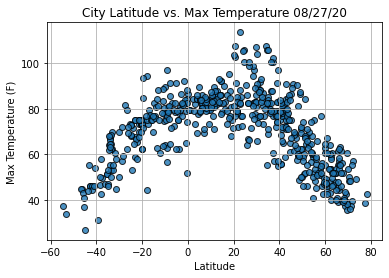

In [15]:
#build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
           max_temps,
           edgecolor = 'black', linewidths = 1, marker = 'o',
           alpha = 0.8, label = "Cities")

#incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel('Latitude')
plt.grid(True)

#save the figure
plt.savefig('weather_data/Fig1.png')
          
#Show plot
plt.show()

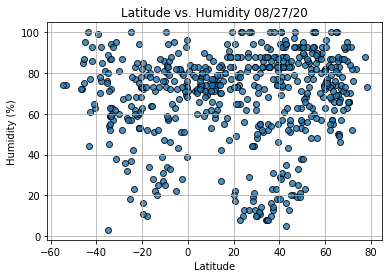

In [16]:
#build the scatter plot for latitude vs. humidity
plt.scatter(lats,
           humidity,
           edgecolor = 'black', linewidths = 1, marker = 'o',
           alpha = 0.8, label = "Cities")

#incorporate the other graph properties
plt.title(f"Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel('Latitude')
plt.grid(True)

#save the figure
plt.savefig('weather_data/Fig2.png')
          
#Show plot
plt.show()

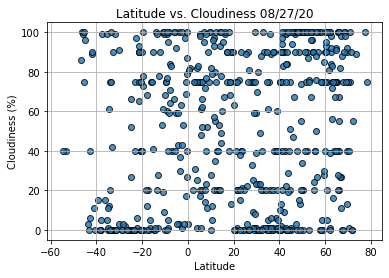

In [17]:
#build the scatter plot for latitude vs. cloudiness
plt.scatter(lats,
           cloudiness,
           edgecolor = 'black', linewidths = 1, marker = 'o',
           alpha = 0.8, label = "Cities")

#incorporate the other graph properties
plt.title(f"Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel('Latitude')
plt.grid(True)

#save the figure
plt.savefig('weather_data/Fig3.png')
          
#Show plot
plt.show()

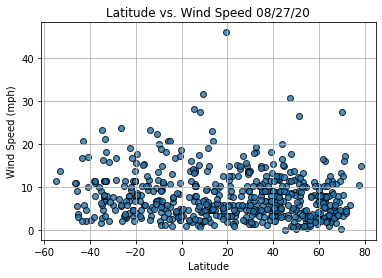

In [18]:
#build the scatter plot for latitude vs. wind speed
plt.scatter(lats,
           wind_speed,
           edgecolor = 'black', linewidths = 1, marker = 'o',
           alpha = 0.8, label = "Cities")

#incorporate the other graph properties
plt.title(f"Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel('Latitude')
plt.grid(True)

#save the figure
plt.savefig('weather_data/Fig4.png')
          
#Show plot
plt.show()

In [19]:
#imort linear regression from the SciPy stats module
from scipy.stats import linregress

In [66]:
#Create (define) a function to create/perform linear regression on the weather data
#and plot a gregression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    #run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    #calculate the regression line "y_values" from the slope and intercept
    regress_values = x_values * slope + intercept
    
    #get the equation of the line
    line_eq = 'y =' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
    
    #create a scatter plot and plot the regression line.
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, 'r')
    
    #annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize = 15, color= 'red')
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [67]:
#retireve information from row 13 of city_data_df
index13 = city_data_df.loc[13]
index13

City                       Cayenne
Country                         GF
Date          2020-08-27  13:58:36
Lat                           4.93
Lng                         -52.33
Max Temp                      89.6
Humidity                        66
Cloudiness                      75
Wind Speed                    3.36
Name: 13, dtype: object

In [68]:
#create northern and southern hemisphere DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >=0)]
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] <=0)]

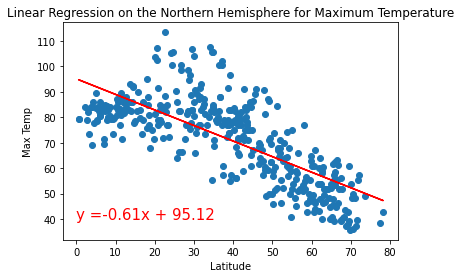

In [86]:
#Linear regression on Northern Hemisphere
#set x values to Laititude and y values to Max Temp
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
title = 'Linear Regression on the Northern Hemisphere for Maximum Temperature'
#run plot_linear_regression function and edit titme, y_label and text_coordinates for Max temp scatter
plot_linear_regression(x_values, y_values,
                       title, 'Max Temp', (0,40))

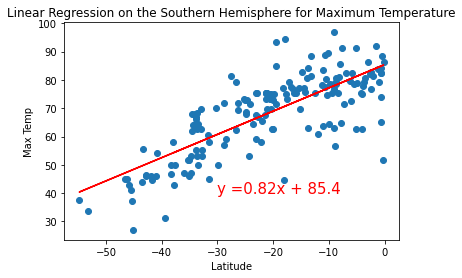

In [73]:
#Linear regression on Southern Hemisphere
#set x values to Laititude and y values to Max Temp
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
title = 'Linear Regression on the Southern Hemisphere for Maximum Temperature'
#run plot_linear_regression function and edit titme, y_label and text_coordinates for Max temp scatter
plot_linear_regression(x_values, y_values,
                       title, 'Max Temp', (-30,40))

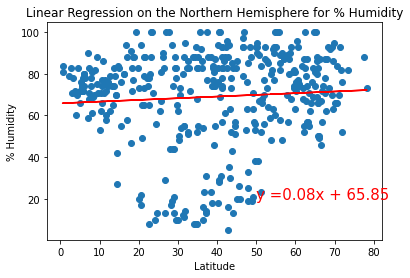

In [80]:
#Linear regression on Northern Hemisphere
#set x values to Laititude and y values to Humidity
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
#run plot_linear_regression function and edit titme, y_label and text_coordinates for Max temp scatter
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', 
                       '% Humidity', (50,20))

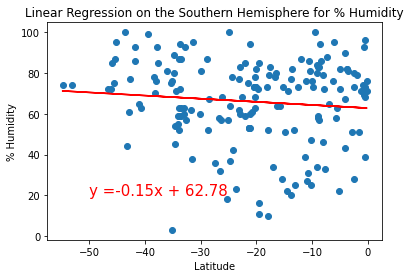

In [79]:
#Linear regression on Southern Hemisphere
#set x values to Laititude and y values to Humidity
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
#run plot_linear_regression function and edit titme, y_label and text_coordinates for Max temp scatter
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', 
                       '% Humidity', (-50,20))

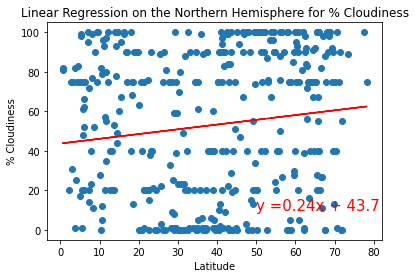

In [83]:
#Linear regression on Northern Hemisphere
#set x values to Laititude and y values to Cloudiness
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
#run plot_linear_regression function and edit titme, y_label and text_coordinates for Cloudiness scatter
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', 
                       '% Cloudiness', (50,10))

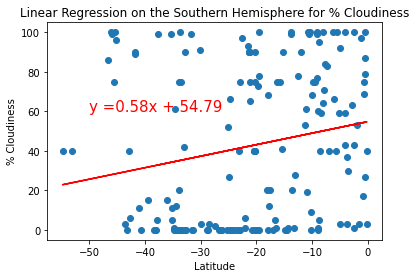

In [88]:
#Linear regression on Southern Hemisphere
#set x values to Laititude and y values to Cloudiness
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
#run plot_linear_regression function and edit titme, y_label and text_coordinates for Cloudiness scatter
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', 
                       '% Cloudiness', (-50,60))

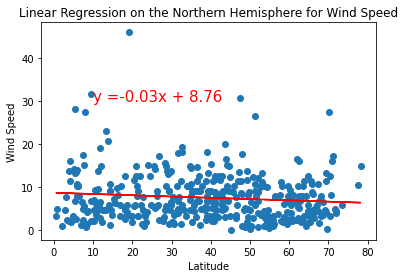

In [90]:
#Linear regression on Northern Hemisphere
#set x values to Laititude and y values to Wind Speed
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
#run plot_linear_regression function and edit titme, y_label and text_coordinates for Wind Speed scatter
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 
                       'Wind Speed', (10,30))

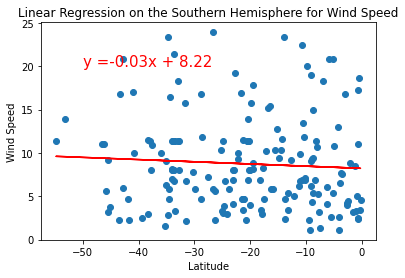

In [92]:
#Linear regression on Southern Hemisphere
#set x values to Laititude and y values to Cloudiness
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
#run plot_linear_regression function and edit titme, y_label and text_coordinates for Cloudiness scatter
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 
                       'Wind Speed', (-50,20))